In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd, numpy as np
import feather, h5py
import matplotlib.pyplot as plt
import seaborn as sns
import ipympl


# Merge the outputs of the optimization model with the power plant characteristics

In [2]:
base_name = 'base'
gen = feather.read_dataframe(f'./outputs/gen_{base_name}.feather')

case_name = 'amtk_current'
gen_case = feather.read_dataframe(f'./outputs/gen_{case_name}.feather')

## Plot load by region

In [3]:
base_load = pd.read_csv(f'./inputs/inputs_load_{base_name}.csv')
case_load = pd.read_csv(f'./inputs/inputs_load_{case_name}.csv')

In [4]:
base_data = base_load.groupby('r')['demandLoad'].sum()
case_data = case_load.groupby('r')['demandLoad'].sum()
print(base_data)
print(list(base_data.index))

r
ERC_REST    3.534101e+08
ERC_WEST    2.805229e+07
FRCC        2.295026e+08
MAP_WAUE    2.258852e+07
MIS_IA      2.141787e+07
                ...     
WECC_UT     3.689454e+07
WECC_WY     1.184036e+07
WEC_CALN    1.148266e+08
WEC_LADW    2.643005e+07
WEC_SDGE    2.071097e+07
Name: demandLoad, Length: 61, dtype: float64
['ERC_REST', 'ERC_WEST', 'FRCC', 'MAP_WAUE', 'MIS_IA', 'MIS_IL', 'MIS_INKY', 'MIS_LMI', 'MIS_MAPP', 'MIS_MIDA', 'MIS_MNWI', 'MIS_MO', 'MIS_WUMS', 'NENGREST', 'NENG_CT', 'NENG_ME', 'NY_Z_AB', 'NY_Z_CE', 'NY_Z_D', 'NY_Z_F', 'NY_Z_GI', 'NY_Z_J', 'NY_Z_K', 'PJM_AP', 'PJM_ATSI', 'PJM_COMD', 'PJM_Dom', 'PJM_EMAC', 'PJM_PENE', 'PJM_SMAC', 'PJM_WMAC', 'PJM_West', 'SPP_N', 'SPP_NEBR', 'SPP_SE', 'SPP_SPS', 'SPP_WEST', 'S_C_KY', 'S_C_TVA', 'S_D_AMSO', 'S_D_N_AR', 'S_D_REST', 'S_D_WOTA', 'S_SOU', 'S_VACA', 'WECC_AZ', 'WECC_CO', 'WECC_ID', 'WECC_IID', 'WECC_MT', 'WECC_NM', 'WECC_NNV', 'WECC_PNW', 'WECC_SCE', 'WECC_SF', 'WECC_SNV', 'WECC_UT', 'WECC_WY', 'WEC_CALN', 'WEC_LADW', 'WEC_S

This plot shows the generation by IPM region for the baseline and baseline+Amtrak cases, showing they are nearly identical

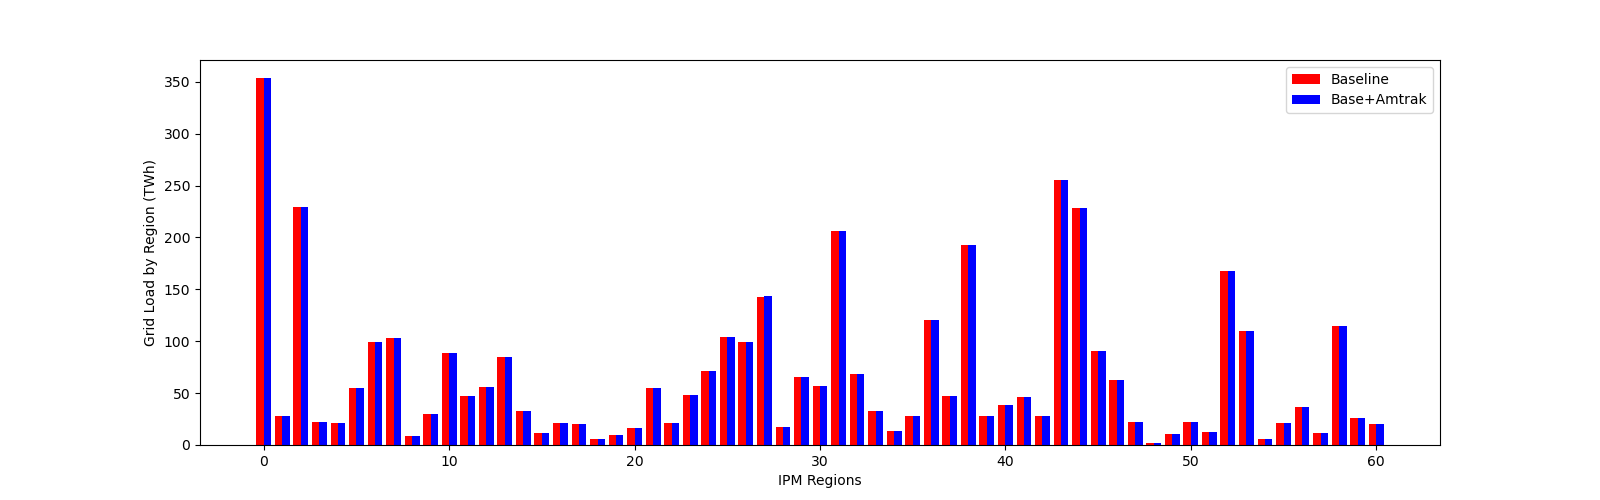

In [5]:
# Bar width and x locations
w, x = 0.4, np.arange(len(base_data))

fig, ax = plt.subplots(figsize=(16,5))
ax.bar(x - w/2, base_data/1000/1000, width=w,color='r',label='Baseline')
ax.bar(x + w/2, case_data/1000/1000, width=w,color='b',label='Base+Amtrak')
ax.set_ylabel('Grid Load by Region (TWh)')
ax.set_xlabel('IPM Regions')
ax.legend()



In [6]:
tmp = pd.concat([base_load.groupby('r')['demandLoad'].sum()/1000], axis=1)
tmp_case = pd.concat([case_load.groupby('r')['demandLoad'].sum()/1000], axis=1)

This plot shows the Amtrak grid load by IPM region resulting from locomotive activity on the Northeast and Keystone Corridors. This shows that the only difference for input load is from Amtrak (no change in ERCOT)

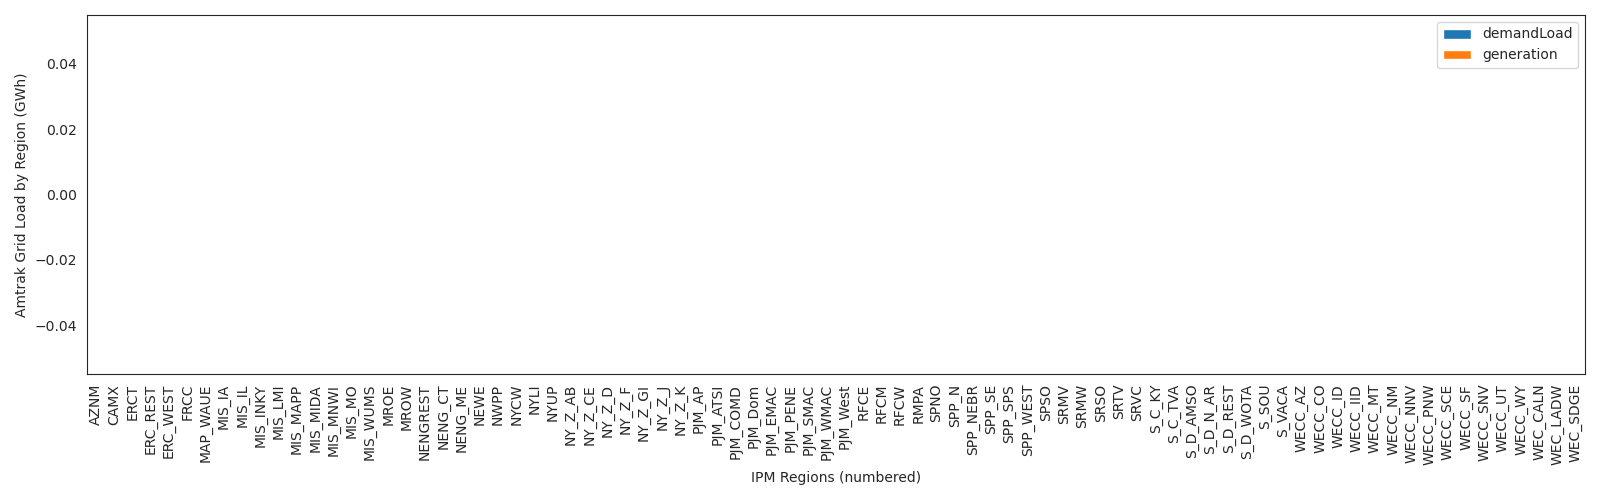

In [21]:
data = tmp_case - tmp

# Filter out rows where load is zero
data = data[data['demandLoad'] != 0]

sns.set_style('white')
fig, ax = plt.subplots(1,1, figsize=(16,5))
data.plot.bar(ax=ax)
ax.set_ylabel('Amtrak Grid Load by Region (GWh)')
kw = {'rotation': 90}
ax.set_xlabel('IPM Regions')
ax.set_xticklabels(ax.get_xticklabels(), **kw)
fig.tight_layout()


In [8]:
print('Amtrak load:', round(data['demandLoad'].sum(),1),'GWh')

Amtrak load: 482.7 GWh


## Plot generation by region

This plot shows the change in generation for each IPM region from the introduction of Amtrak load

In [9]:
#read in the characteristics
carac = pd.read_csv(f'./inputs/inputs_gen_{base_name}.csv')
carac_case = pd.read_csv(f'./inputs/inputs_gen_{case_name}.csv')

#assign a generation column based on the gen df
carac['generation'] = gen.sum(axis=1)
carac_case['generation'] = gen_case.sum(axis=1)
#calculate capacity factor
carac['capafac'] = carac['generation'] / (8759 * carac['Capacity'])
carac_case['capafac'] = carac_case['generation'] / (8759 * carac_case['Capacity'])

In [10]:
print('Baseline generation:', round(carac['generation'].sum()/1000/1000,1),'TWh')
print('Baseline load:', round(base_load['demandLoad'].sum()/1000/1000,1),'TWh') # TWh

print('Base+Amtrak generation:', round(carac_case['generation'].sum()/1000/1000,1),'TWh')
print('Base+Amtrak load:', round(case_load['demandLoad'].sum()/1000/1000,1),'TWh') # TWh

Baseline generation: 4078.0 TWh
Baseline load: 4098.1 TWh
Base+Amtrak generation: 4082.0 TWh
Base+Amtrak load: 4098.6 TWh


### Check the capacity factors

In [11]:
carac.loc[carac['capafac'] > 1.01, :]

,Unnamed: 0,RegionName,FuelType,FuelCostTotal,PLCO2RTA,ORISCode,DIVISIONCE,UNITID,Capacity,OBJECTID,...,PLN2ORTA,PLCH4RTA,PRMVR,FUELU1,pm.mmbtu,pm.mwh,generationCO2,g,generation,capafac
10,10,ERC_REST,Biomass,40.400000,17.333942,54338,WSC-TX,GEND,12.0,16883.0,...,0.024040,0.182343,ST,OBS,0.000000,0.000000,42.0,3801.0,1.023687e+06,9.739384
11,11,ERC_REST,Coal,23.273161,1135.165674,6181,WSC-TX,2,436.0,3370.0,...,0.017690,0.122923,ST,SUB,0.000021,0.210118,2285.0,2622.0,8.198424e+06,2.146789
15,15,ERC_REST,Coal,20.960491,1107.218179,6136,WSC-TX,1,466.0,14025.0,...,0.017236,0.117933,ST,SUB,0.000021,0.207789,2140.0,2589.0,5.229123e+06,1.281116
18,18,ERC_REST,Coal,32.443070,1289.261990,6183,WSC-TX,SM-1,391.0,3372.0,...,0.020412,0.140613,ST,LIG,0.000049,0.579246,2649.0,2624.0,5.167810e+06,1.508951
22,22,ERC_REST,Coal,17.553862,1074.947973,6179,WSC-TX,3,444.0,14045.0,...,0.016783,0.116573,ST,SUB,0.000021,0.215109,2339.0,2619.0,5.007913e+06,1.287714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,16879,SPP_WEST,Coal,22.830000,1228.196983,165,NaN,NaN,1734.0,NaN,...,0.019504,0.047627,NaN,RC,NaN,NaN,NaN,NaN,2.389280e+07,1.573126
16883,16883,S_VACA,Coal,22.830000,810.225591,7210,NaN,NaN,417.0,NaN,...,0.014968,0.009979,NaN,RC,NaN,NaN,NaN,NaN,2.065111e+07,5.653960
16885,16885,S_VACA,Coal,22.830000,837.146158,3298,NaN,NaN,714.0,NaN,...,0.015422,0.010433,NaN,RC,NaN,NaN,NaN,NaN,1.055623e+07,1.687937
16886,16886,S_VACA,Coal,22.830000,1107.664966,6249,NaN,NaN,1260.0,NaN,...,0.017690,0.014061,NaN,RC,NaN,NaN,NaN,NaN,1.604880e+07,1.454178


In [12]:
# convert us names to abbreviations
us_state_abbrev={'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',\
                'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia':\
                'DC','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho':\
                'ID','Illinois': 'IL','Indiana': 'IN','Iowa':'IA','Kansas': 'KS','Kentucky': 'KY',\
                'Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',\
                'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO',\
                'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH',\
                 'New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',\
                 'North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK',\
                 'Oregon': 'OR','Palau': 'PW','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI',\
                 'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',\
                 'Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia':\
                 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

## Plot generation by state for base and case

In [13]:
carac['StateAbb'] = carac['StateName'].apply(lambda x: us_state_abbrev[x])
carac_case['StateAbb'] = carac_case['StateName'].apply(lambda x: us_state_abbrev[x])

In [19]:
base_data = carac.groupby('SUBRGN')['generation'].sum()
case_data = carac_case.groupby('SUBRGN')['generation'].sum()
print(base_data)
print(list(base_data.index))

SUBRGN
AZNM    1.505466e+08
CAMX    2.293691e+08
ERCT    3.398605e+08
FRCC    2.326368e+08
MROE    1.066337e+07
MROW    2.753820e+08
NEWE    1.177010e+08
NWPP    3.022015e+08
NYCW    2.989208e+07
NYLI    9.503333e+06
NYUP    1.070279e+08
RFCE    3.192477e+08
RFCM    9.956734e+07
RFCW    4.418598e+08
RMPA    7.348311e+07
SPNO    5.570897e+07
SPSO    1.572739e+08
SRMV    1.416066e+08
SRMW    1.516187e+08
SRSO    2.417035e+08
SRTV    2.772432e+08
SRVC    3.138933e+08
Name: generation, dtype: float64
['AZNM', 'CAMX', 'ERCT', 'FRCC', 'MROE', 'MROW', 'NEWE', 'NWPP', 'NYCW', 'NYLI', 'NYUP', 'RFCE', 'RFCM', 'RFCW', 'RMPA', 'SPNO', 'SPSO', 'SRMV', 'SRMW', 'SRSO', 'SRTV', 'SRVC']


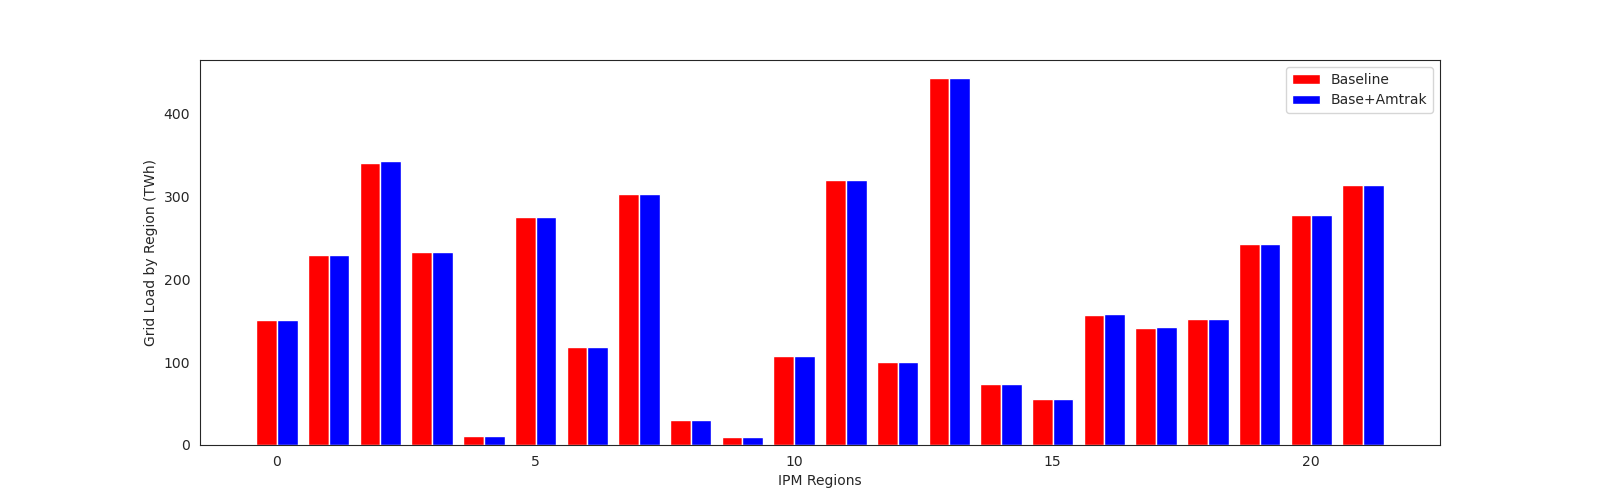

In [20]:
# Bar width and x locations
w, x = 0.4, np.arange(len(base_data))

fig, ax = plt.subplots(figsize=(16,5))
ax.bar(x - w/2, base_data/1000/1000, width=w,color='r',label='Baseline')
ax.bar(x + w/2, case_data/1000/1000, width=w,color='b',label='Base+Amtrak')
ax.set_ylabel('Grid Load by Region (TWh)')
ax.set_xlabel('IPM Regions (numbered)')
ax.legend()

In [14]:
tmp = pd.concat([(carac_case.groupby('SUBRGN')['generation'].sum()-carac.groupby('SUBRGN')['generation'].sum())], axis=1) # MWh

tmp = tmp/1000 # GWh
# Filter out rows where load is zero
tmp = tmp[tmp['generation'] != 0]

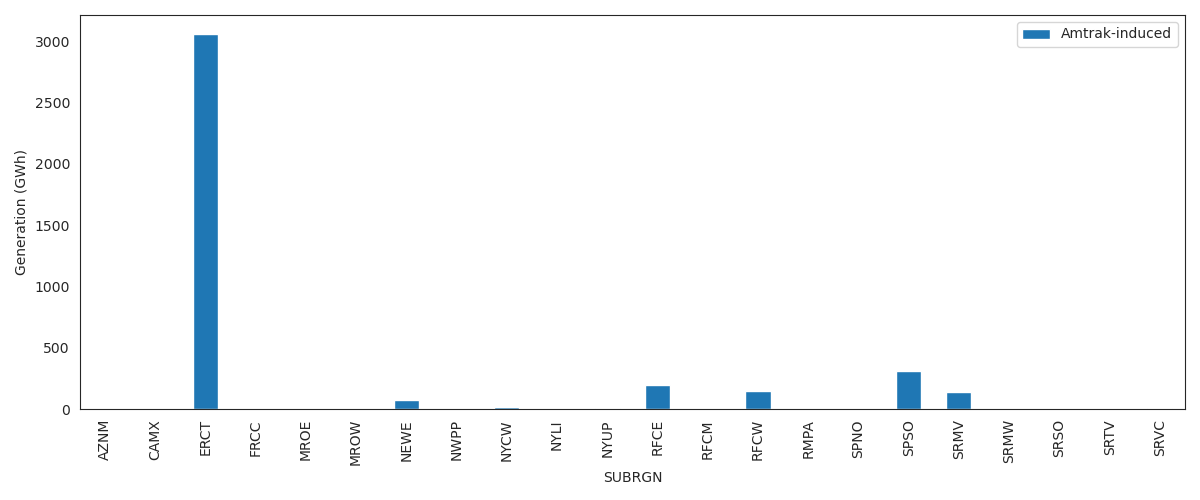

In [15]:
sns.set_style('white')
fig, ax = plt.subplots(1,1, figsize=(12,5))
tmp.rename(columns={'generation': 'Amtrak-induced'}).plot.bar(ax=ax)
#ax.set_ylabel('Change in generation (%)')
ax.set_ylabel('Generation (GWh)')
#plt.ylim(0,10)
#plt.axhline(y=0, color='grey', linestyle='--') # Add a horizontal line at y=0
kw = {'rotation': 90}
ax.set_xticklabels(ax.get_xticklabels(), **kw)
fig.tight_layout()
#plt.savefig('gen_per_state.png', dpi=300)

In [16]:
tmp = pd.concat([(carac_case.groupby('SUBRGN')['generation'].sum()-carac.groupby('SUBRGN')['generation'].sum())/carac.groupby('SUBRGN')['generation'].sum()*100], axis=1) # %

# Filter out rows where load is zero
tmp = tmp[tmp['generation'] != 0]

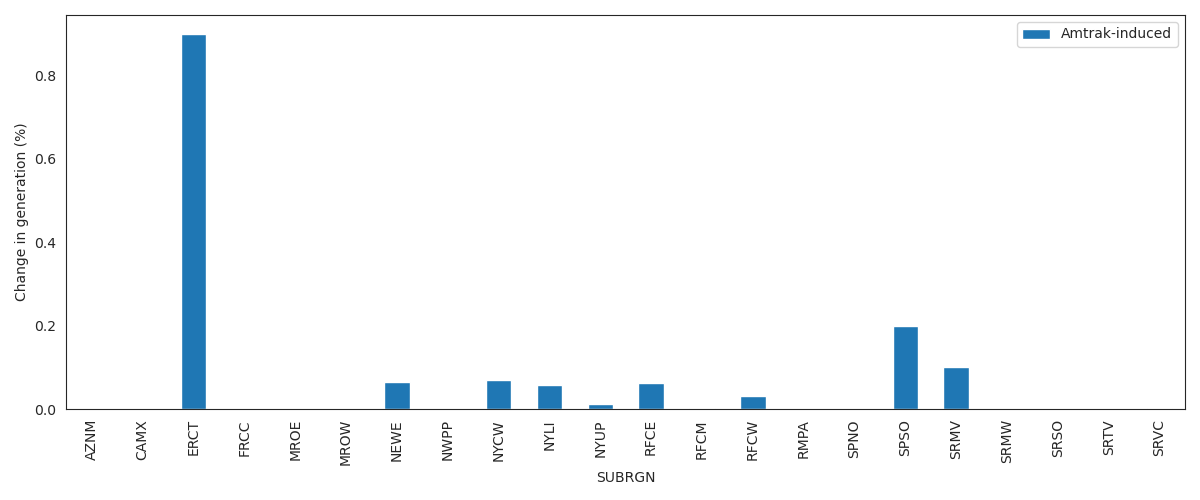

In [17]:
sns.set_style('white')
fig, ax = plt.subplots(1,1, figsize=(12,5))
tmp.rename(columns={'generation': 'Amtrak-induced'}).plot.bar(ax=ax)
ax.set_ylabel('Change in generation (%)')
#ax.set_ylabel('Generation (GWh)')
#plt.ylim(0,10)
#plt.axhline(y=0, color='grey', linestyle='--') # Add a horizontal line at y=0
kw = {'rotation': 90}
ax.set_xticklabels(ax.get_xticklabels(), **kw)
fig.tight_layout()
#plt.savefig('gen_per_state.png', dpi=300)